In [1]:
import numpy as np
import glob
import yaml
import matplotlib.pyplot as plt
import math
import scipy.special

In [21]:
def summarize_results(target_dir):
    out_dic = {}
    criteria = ['random_l2risk']
    methods = ['borges','inductive']
    for c in criteria:
        out_dic[c] = {}
        for m in methods:
            out_dic[c][m] = []
    for d in glob.glob(target_dir+"*/*"):
        fname = d +'/output.yml'
        yml = yaml.load(open(fname,'r'))
        for c in criteria:
            for m in methods:
                if m in yml['results'][c]:
                    out_dic[c][m].append(yml['results'][c][m])
    return(out_dic)
summarize_results(target_dir="../results_19-04-24/linear_M.3_L.100_D.2_N.1000_sigma.0.1")

{'random_l2risk': {'borges': [0.006021839808468716,
   0.006512454765093007,
   0.0055873048880126985,
   0.0064241746598236215,
   0.005451258907013064,
   0.005510993352974632,
   0.005739545196942634,
   0.005839069863221058,
   0.0070038468686625804,
   0.006631240426096831,
   0.006272296363730902,
   0.006197903346846735,
   0.0057325675014015575,
   0.005892439184508531,
   0.005829773773299276,
   0.00631968979541588,
   0.0066680695543979585,
   0.005694594618962632,
   0.0054793598547057745,
   0.0063193560228971685],
  'inductive': [0.006079110298576646,
   0.005058031339752089,
   0.006058969277435294,
   0.0055556763031401005,
   0.0052724134853395005,
   0.005323594733210876,
   0.0048934739636030105,
   0.005918722526604406,
   0.005123276929280919,
   0.005261570170184332,
   0.0046616247444481946,
   0.005127618420919359,
   0.005381607740880689,
   0.0056992807002643345,
   0.0051505043674065585,
   0.00533907376640796,
   0.005259675235570294,
   0.005471773659733229

In [8]:
def risk_borges(sigma,L,D,M,N):
    return((sigma**2)*L*scipy.special.binom(D+M-1,D)/N)#/math.factorial(M-1)

coef_inductive = {(2,3):5.4963,
                  (2,4):8.6666,
                  (2,5):11.9936,
                  (2,6):15.11634,
                  (2,7):18.0687,
                  (2,8):20.6800,
                  (3,3):10.6472,
                  (3,4):23.8822,
                  (3,5):1.8516*math.factorial(5-1),
                  (3,6):0.606483*math.factorial(6-1),
                  (3,7):0.147204*math.factorial(7-1),
                  (3,8):0.0266143*math.factorial(8-1),
                 }
coef_inductive_naive = {(2,3):6.75,
                        (2,4):11.2,
                        (2,5):15.53571,
                        (2,6):19.5,
                        (2,7):23.04167,
                        (2,8):26.18182,
                        (3,3):14.05913,
                        (3,4):30.66626,
                        (3,5):2.522451*math.factorial(5-1),
                        (3,6):0.856287*math.factorial(6-1),
                        (3,7):0.211408*math.factorial(7-1),
                        (3,8):0.041849*math.factorial(8-1),
                         }
    
def risk_inductive(sigma,L,D,M,N):
    return((sigma**2)*L*coef_inductive[(D,M)]/N)
def risk_inductive_naive(sigma,L,D,M,N):
    return((sigma**2)*L*coef_inductive_naive[(D,M)]/N)
print(risk_borges(sigma=0.1,L=3,D=2,M=8,N=1000))
print(risk_inductive(sigma=0.1,L=3,D=2,M=8,N=1000))
print(risk_inductive_naive(sigma=0.1,L=3,D=2,M=8,N=1000))

0.0010800000000000002
0.0006204
0.0007854546000000001


In [4]:
coef_inductive

{(2, 3): 5.4963,
 (2, 4): 8.6666,
 (2, 5): 11.9936,
 (2, 6): 15.11634,
 (2, 7): 18.0687,
 (2, 8): 20.68,
 (3, 3): 10.6472,
 (3, 4): 23.8822,
 (3, 5): 44.4384,
 (3, 6): 72.77796,
 (3, 7): 105.98688,
 (3, 8): 134.136072}

In [9]:
print(8.35657*math.factorial(4-1))
print(scipy.special.binom(3+4-1,3))
print(5.19737*math.factorial(3-1))


50.13942
20.0
10.39474


In [27]:
import glob
target_dir = "../results_19-04-24"
result_dict = {}
for dname in glob.glob(target_dir+"/*"):
    d = dname.split("_")
    M = int(d[-5].split(".")[-1])
    L = int(d[-4].split(".")[-1])
    D = int(d[-3].split(".")[-1])
    N = int(d[-2].split(".")[-1])
    result_dict[M,L,D,N]= summarize_results(target_dir=dname)
    #print(d,M,L,D,N)
def result(M,L,D,N):
    return(result_dict[M,L,D,N])
result(M=3,L=100,D=2,N=1000)


{'random_l2risk': {'borges': [0.006021839808468716,
   0.006512454765093007,
   0.0055873048880126985,
   0.0064241746598236215,
   0.005451258907013064,
   0.005510993352974632,
   0.005739545196942634,
   0.005839069863221058,
   0.0070038468686625804,
   0.006631240426096831,
   0.006272296363730902,
   0.006197903346846735,
   0.0057325675014015575,
   0.005892439184508531,
   0.005829773773299276,
   0.00631968979541588,
   0.0066680695543979585,
   0.005694594618962632,
   0.0054793598547057745,
   0.0063193560228971685],
  'inductive': [0.006079110298576646,
   0.005058031339752089,
   0.006058969277435294,
   0.0055556763031401005,
   0.0052724134853395005,
   0.005323594733210876,
   0.0048934739636030105,
   0.005918722526604406,
   0.005123276929280919,
   0.005261570170184332,
   0.0046616247444481946,
   0.005127618420919359,
   0.005381607740880689,
   0.0056992807002643345,
   0.0051505043674065585,
   0.00533907376640796,
   0.005259675235570294,
   0.005471773659733229

In [28]:
target_dir = "../results_inductive_naive"
result_naive_dict = {}
for dname in glob.glob(target_dir+"/*"):
    d = dname.split("_")
    M = int(d[-5].split(".")[-1])
    L = int(d[-4].split(".")[-1])
    D = int(d[-3].split(".")[-1])
    N = int(d[-2].split(".")[-1])
    result_naive_dict[M,L,D,N]= summarize_results(target_dir=dname)
    #print(d,M,L,D,N)
def result_naive(M,L,D,N):
    return(result_naive_dict[M,L,D,N])
result_naive(M=3,L=100,D=3,N=1000)

{'random_l2risk': {'borges': [],
  'inductive': [0.01331525105801881,
   0.01333567763604195,
   0.014712575969912937,
   0.013786694768390942,
   0.012389359248596769,
   0.013623198452275803,
   0.015560965496628157,
   0.014297908228364832,
   0.01395975584047203,
   0.015616710369827109,
   0.014393948942595597,
   0.016441871286530314,
   0.014144396639146805,
   0.014400002560553076,
   0.015492089224077759,
   0.014827758263885658,
   0.015079153281881176,
   0.013840005827410897,
   0.014339549463040427,
   0.014000706941458782]}}

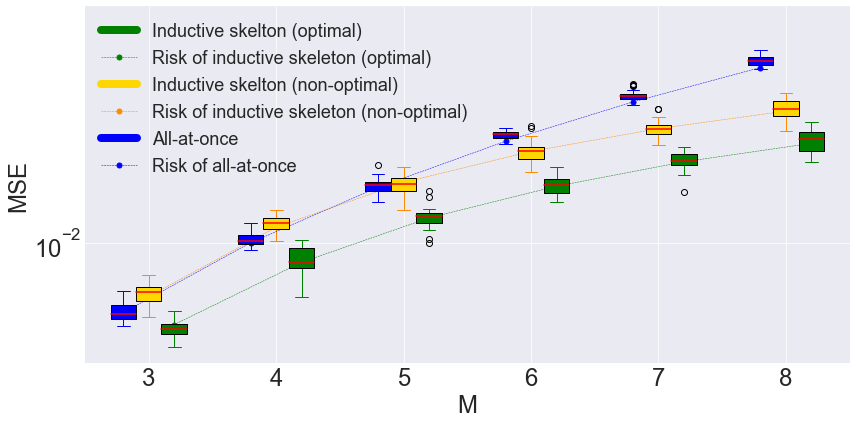

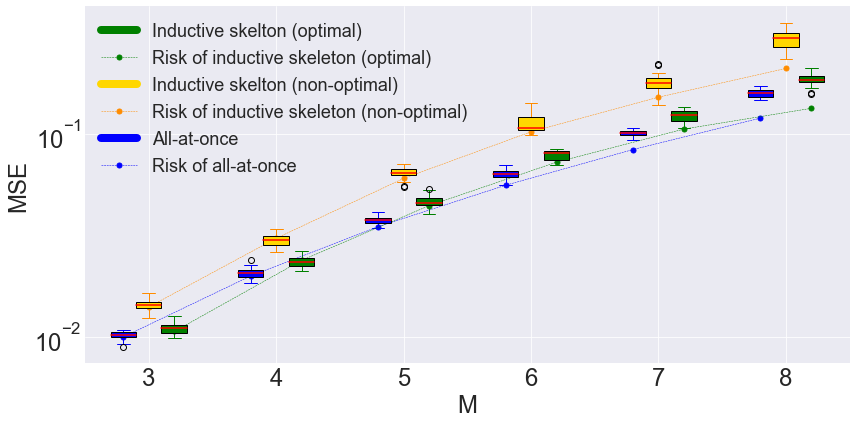

In [63]:
def plot_boxplot_vs_M(N,D,L,figname,location):
    M_list = [3,4,5,6,7,8]
    style = 'seaborn-darkgrid'
    plt.figure(figsize=(12,6))
    plt.style.use(style)
    plt.yscale("log")
    
    
    for M in M_list:
        bp = plt.boxplot(result(M=M,N=N,D=D,L=L)['random_l2risk']['borges'],
                        positions=[M-0.2],
                        widths=0.2,
                        patch_artist=True)
        bp['boxes'][0].set_facecolor('blue') #黄色(バナナ)
        plt.setp(bp['medians'][0], color='red', linewidth=1.5) #メディアン
        plt.setp(bp['caps'][0],color='blue', linewidth=1) #はこ髭の上限の線の太さ
        plt.setp(bp['caps'][1],color='blue', linewidth=1) #はこ髭の下限の線の太さ
        plt.setp(bp['whiskers'][0],color='blue', linewidth=1) #boxから伸びる上の点線の太さ
        plt.setp(bp['whiskers'][1],color='blue', linewidth=1) #boxから伸びる下の点線の太さ

        bp = plt.boxplot(result(M=M,N=N,D=D,L=L)['random_l2risk']['inductive'],
                        positions=[M+0.2],
                        widths=0.2,
                        patch_artist=True)
        bp['boxes'][0].set_facecolor('green') #黄色(バナナ)
        plt.setp(bp['medians'][0], color='red', linewidth=1.5) #メディアン
        plt.setp(bp['caps'][0],color='green', linewidth=1) #はこ髭の上限の線の太さ
        plt.setp(bp['caps'][1],color='green', linewidth=1) #はこ髭の下限の線の太さ
        plt.setp(bp['whiskers'][0],color='green', linewidth=1) #boxから伸びる上の点線の太さ
        plt.setp(bp['whiskers'][1],color='green', linewidth=1) #boxから伸びる下の点線の太さ

        bp = plt.boxplot(result_naive(M=M,N=N,D=D,L=L)['random_l2risk']['inductive'],
                        positions=[M],
                        widths=0.2,
                        patch_artist=True)
        bp['boxes'][0].set_facecolor('gold') #黄色(バナナ)
        #bp['boxes'][0].set_alpha(0.2) #黄色(バナナ)
        plt.setp(bp['medians'][0], color='red', linewidth=1.5) #メディアン
        plt.setp(bp['caps'][0],color='darkorange', linewidth=1) #はこ髭の上限の線の太さ
        plt.setp(bp['caps'][1],color='darkorange', linewidth=1) #はこ髭の下限の線の太さ
        plt.setp(bp['whiskers'][0],color='darkorange', linewidth=1) #boxから伸びる上の点線の太さ
        plt.setp(bp['whiskers'][1],color='darkorange', linewidth=1) #boxから伸びる下の点線の太さ
        
    borges, = plt.plot([0.05,0.05], color='blue', linewidth=8) #実際に線をプロットします。
    inductive, = plt.plot([0.05,0.05], color='green', linewidth=8)
    inductive_naive, = plt.plot([0.05,0.05], color='gold', linewidth=8)
    risk_borges_list = [risk_borges(sigma=0.1,L=L,M=M,D=D,N=1000) for M in M_list]
    risk_inductive_list = [risk_inductive(sigma=0.1,L=L,M=M,D=D,N=1000) for M in M_list]
    risk_inductive_naive_list = [risk_inductive_naive(sigma=0.1,L=L,M=M,D=D,N=1000) for M in M_list]
    theo_borges, = plt.plot([M-0.2 for M in M_list],
                  risk_borges_list,color="blue",linewidth=0.5,linestyle='dashed',marker='o',markersize=5)
    theo_inductive, = plt.plot([M+0.2 for M in M_list],
                     risk_inductive_list,color="green",linewidth=0.5,linestyle='dashed',marker='o',markersize=5)
    theo_inductive_naive, = plt.plot([M for M in M_list],
                     risk_inductive_naive_list,color="darkorange",linewidth=0.5,linestyle='dashed',marker='o',markersize=5)
    plt.legend([inductive,theo_inductive, inductive_naive,theo_inductive_naive,borges,theo_borges],
               ['Inductive skelton (optimal)','Risk of inductive skeleton (optimal)',
                'Inductive skelton (non-optimal)','Risk of inductive skeleton (non-optimal)',
                'All-at-once','Risk of all-at-once'],fontsize=18,loc=location) #レジェンドの表示
    inductive.set_visible(False) #プロットした線を見えなくします。
    inductive_naive.set_visible(False)
    borges.set_visible(False)
    plt.xlim([2.5,8.5])
    plt.tick_params(labelsize = 24)
    plt.xlabel("M", fontsize=24)
    plt.ylabel("MSE", fontsize=24)
    plt.xticks([M for M in M_list],[M for M in M_list])
    plt.tight_layout()
    plt.savefig(figname)
plot_boxplot_vs_M(N = 1000,D = 2,L = 100,figname="../fig2/D=2_L=100_N=1000.pdf",location='upper left')
plot_boxplot_vs_M(N = 1000,D = 3,L = 100,figname="../fig2/D=3_L=100_N=1000.pdf",location='upper left')

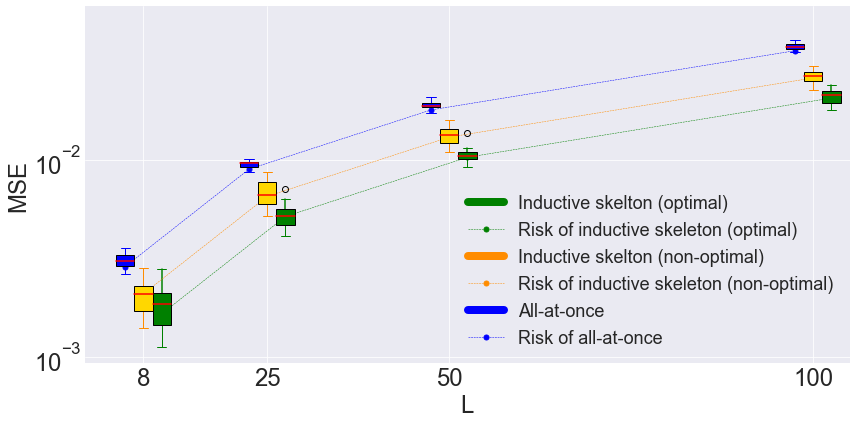

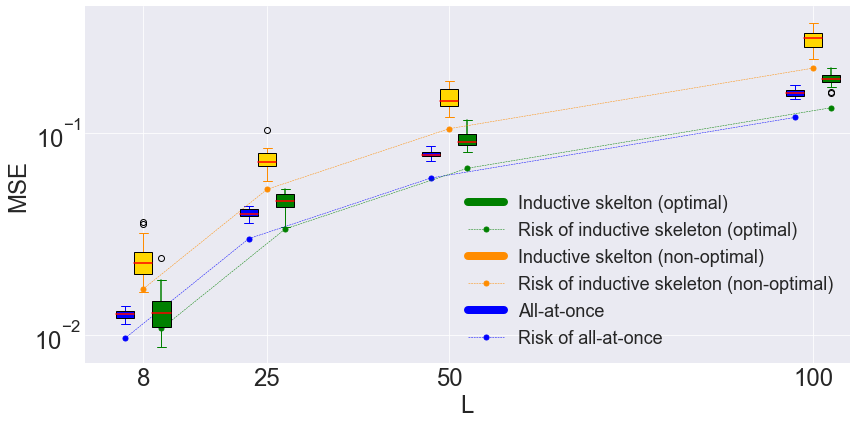

In [73]:
def plot_boxplot_vs_L(M,D,N,figname,location):
    L_list = [8,25,50,100]
    style = 'seaborn-darkgrid'
    plt.figure(figsize=(12,6))
    plt.style.use(style)
    plt.yscale("log")
    
    scale = 10
    for L in L_list:
        bp = plt.boxplot(result(M=M,N=N,D=D,L=L)['random_l2risk']['borges'],
                        positions=[L/scale-0.25],
                        widths=0.25,
                        patch_artist=True)
        bp['boxes'][0].set_facecolor('blue') #黄色(バナナ)
        plt.setp(bp['medians'][0], color='red', linewidth=1.5) #メディアン
        plt.setp(bp['caps'][0],color='blue', linewidth=1) #はこ髭の上限の線の太さ
        plt.setp(bp['caps'][1],color='blue', linewidth=1) #はこ髭の下限の線の太さ
        plt.setp(bp['whiskers'][0],color='blue', linewidth=1) #boxから伸びる上の点線の太さ
        plt.setp(bp['whiskers'][1],color='blue', linewidth=1) #boxから伸びる下の点線の太さ

        bp = plt.boxplot(result(M=M,N=N,D=D,L=L)['random_l2risk']['inductive'],
                        positions=[L/scale+0.25],
                        widths=0.25,
                        patch_artist=True)
        bp['boxes'][0].set_facecolor('green') #黄色(バナナ)
        plt.setp(bp['medians'][0], color='red', linewidth=1.5) #メディアン
        plt.setp(bp['caps'][0],color='green', linewidth=1) #はこ髭の上限の線の太さ
        plt.setp(bp['caps'][1],color='green', linewidth=1) #はこ髭の下限の線の太さ
        plt.setp(bp['whiskers'][0],color='green', linewidth=1) #boxから伸びる上の点線の太さ
        plt.setp(bp['whiskers'][1],color='green', linewidth=1.5) #boxから伸びる下の点線の太さ

        bp = plt.boxplot(result_naive(M=M,N=N,D=D,L=L)['random_l2risk']['inductive'],
                positions=[L/scale],
                widths=0.25,
                patch_artist=True)
        bp['boxes'][0].set_facecolor('gold') #黄色(バナナ)
        plt.setp(bp['medians'][0], color='red', linewidth=1.5) #メディアン
        plt.setp(bp['caps'][0],color='darkorange', linewidth=1) #はこ髭の上限の線の太さ
        plt.setp(bp['caps'][1],color='darkorange', linewidth=1) #はこ髭の下限の線の太さ
        plt.setp(bp['whiskers'][0],color='darkorange', linewidth=1) #boxから伸びる上の点線の太さ
        plt.setp(bp['whiskers'][1],color='darkorange', linewidth=1) #boxから伸びる下の点線の太さ

    borges, = plt.plot([0.05,0.05], color='blue', linewidth=8) #実際に線をプロットします。
    inductive, = plt.plot([0.05,0.05], color='green', linewidth=8)
    inductive_naive, = plt.plot([0.05,0.05], color='darkorange', linewidth=8)
    
    risk_borges_list = [risk_borges(sigma=0.1,L=L,M=M,D=D,N=N) for L in L_list]
    risk_inductive_list = [risk_inductive(sigma=0.1,L=L,M=M,D=D,N=N) for L in L_list]
    risk_inductive_naive_list = [risk_inductive_naive(sigma=0.1,L=L,M=M,D=D,N=N) for L in L_list]
    theo_borges, = plt.plot([L/scale-0.25 for L in L_list],
                  risk_borges_list,color="blue",linewidth=0.5,linestyle='dashed',marker='o',markersize=5)
    theo_inductive, = plt.plot([L/scale+0.25 for L in L_list],
                     risk_inductive_list,color="green",linewidth=0.5,linestyle='dashed',marker='o',markersize=5)
    theo_inductive_naive, = plt.plot([L/scale for L in L_list],
                     risk_inductive_naive_list,color="darkorange",linewidth=0.5,linestyle='dashed',marker='o',markersize=5)
    plt.legend([inductive,theo_inductive, inductive_naive,theo_inductive_naive,borges,theo_borges],
               ['Inductive skelton (optimal)','Risk of inductive skeleton (optimal)',
                'Inductive skelton (non-optimal)','Risk of inductive skeleton (non-optimal)',
                'All-at-once','Risk of all-at-once'],fontsize=18,loc=location) #レジェンドの表示
    inductive.set_visible(False) #プロットした線を見えなくします。
    inductive_naive.set_visible(False)
    borges.set_visible(False)
    plt.xlim([0,10.5])
    plt.tick_params(labelsize = 24)
    plt.xlabel("L", fontsize=24)
    plt.ylabel("MSE", fontsize=24)
    plt.xticks([L/scale for L in L_list],[L for L in L_list])
    plt.tight_layout()
    plt.savefig(figname)
plot_boxplot_vs_L(N=1000,M = 8,D = 2,figname="../fig2/D=2_M=8_N=1000.pdf",location="lower right")
plot_boxplot_vs_L(N=1000,M = 8,D = 3,figname="../fig2/D=3_M=8_N=1000.pdf",location="lower right")

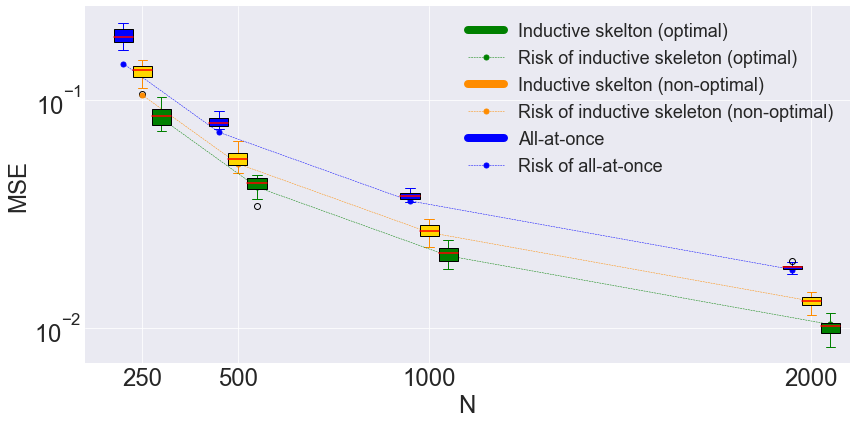

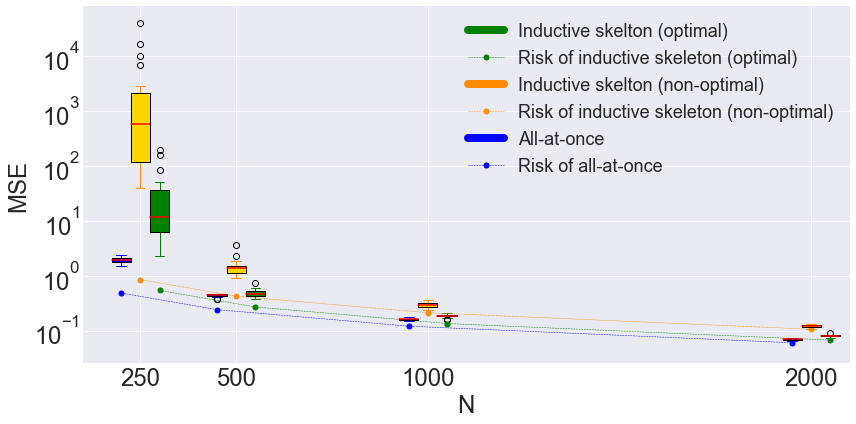

In [82]:
def plot_boxplot_vs_N(M,L,D,figname):
    N_list = [250,500,1000,2000]
    style = 'seaborn-darkgrid'
    plt.figure(figsize=(12,6))
    plt.style.use(style)
    plt.yscale("log")
    
    scale = 200
    for N in N_list:
        bp = plt.boxplot(result(M=M,N=N,D=D,L=L)['random_l2risk']['borges'],
                        positions=[N/scale-0.25],
                        widths=0.25,
                        patch_artist=True)
        bp['boxes'][0].set_facecolor('blue') #黄色(バナナ)
        plt.setp(bp['medians'][0], color='red', linewidth=1.5) #メディアン
        plt.setp(bp['caps'][0],color='blue', linewidth=1) #はこ髭の上限の線の太さ
        plt.setp(bp['caps'][1],color='blue', linewidth=1) #はこ髭の下限の線の太さ
        plt.setp(bp['whiskers'][0],color='blue', linewidth=1) #boxから伸びる上の点線の太さ
        plt.setp(bp['whiskers'][1],color='blue', linewidth=1) #boxから伸びる下の点線の太さ

        bp = plt.boxplot(result(M=M,N=N,D=D,L=L)['random_l2risk']['inductive'],
                        positions=[N/scale+0.25],
                        widths=0.25,
                        patch_artist=True)
        bp['boxes'][0].set_facecolor('green') #黄色(バナナ)
        plt.setp(bp['medians'][0], color='red', linewidth=1.5) #メディアン
        plt.setp(bp['caps'][0],color='green', linewidth=1) #はこ髭の上限の線の太さ
        plt.setp(bp['caps'][1],color='green', linewidth=1) #はこ髭の下限の線の太さ
        plt.setp(bp['whiskers'][0],color='green', linewidth=1) #boxから伸びる上の点線の太さ
        plt.setp(bp['whiskers'][1],color='green', linewidth=1) #boxから伸びる下の点線の太さ
        
        bp = plt.boxplot(result_naive(M=M,N=N,D=D,L=L)['random_l2risk']['inductive'],
                positions=[N/scale],
                widths=0.25,
                patch_artist=True)
        bp['boxes'][0].set_facecolor('gold') #黄色(バナナ)
        plt.setp(bp['medians'][0], color='red', linewidth=1.5) #メディアン
        plt.setp(bp['caps'][0],color='darkorange', linewidth=1) #はこ髭の上限の線の太さ
        plt.setp(bp['caps'][1],color='darkorange', linewidth=1) #はこ髭の下限の線の太さ
        plt.setp(bp['whiskers'][0],color='darkorange', linewidth=1) #boxから伸びる上の点線の太さ
        plt.setp(bp['whiskers'][1],color='darkorange', linewidth=1) #boxから伸びる下の点線の太さ

    borges, = plt.plot([0.05,0.05], color='blue', linewidth=8) #実際に線をプロットします。
    inductive, = plt.plot([0.05,0.05], color='green', linewidth=8)
    inductive_naive, = plt.plot([0.05,0.05], color='darkorange', linewidth=8)
    risk_borges_list = [risk_borges(sigma=0.1,L=L,M=M,D=D,N=N) for N in N_list]
    risk_inductive_list = [risk_inductive(sigma=0.1,L=L,M=M,D=D,N=N) for N in N_list]
    risk_inductive_naive_list = [risk_inductive_naive(sigma=0.1,L=L,M=M,D=D,N=N) for N in N_list]
    theo_borges, = plt.plot([N/scale-0.25 for N in N_list],
                  risk_borges_list,color="blue",linewidth=0.5,linestyle='dashed',marker='o',markersize=5)
    theo_inductive, = plt.plot([N/scale+0.25 for N in N_list],
                     risk_inductive_list,color="green",linewidth=0.5,linestyle='dashed',marker='o',markersize=5)
    theo_inductive_naive, = plt.plot([N/scale for N in N_list],
                     risk_inductive_naive_list,color="darkorange",linewidth=0.5,linestyle='dashed',marker='o',markersize=5)
    plt.legend([inductive,theo_inductive, inductive_naive,theo_inductive_naive,borges,theo_borges],
               ['Inductive skelton (optimal)','Risk of inductive skeleton (optimal)',
                'Inductive skelton (non-optimal)','Risk of inductive skeleton (non-optimal)',
                'All-at-once','Risk of all-at-once'],fontsize=18,loc="upper right") #レジェンドの表示
    inductive.set_visible(False) #プロットした線を見えなくします。
    inductive_naive.set_visible(False) #プロットした線を見えなくします。
    borges.set_visible(False)
    plt.xlim([0.5,10.5])
    plt.tick_params(labelsize = 24)
    plt.xlabel("N", fontsize=24)
    plt.ylabel("MSE", fontsize=24)
    plt.xticks([N/scale for N in N_list],[N for N in N_list])
    plt.tight_layout()
    plt.savefig(figname)
plot_boxplot_vs_N(L=100,M = 8,D = 2,figname="../fig3/D=2_M=8_L=100.pdf")
plot_boxplot_vs_N(L=100,M = 8,D = 3,figname="../fig3/D=3_M=8_L=100.pdf")